Unsupervised Machine Learning: Final Project

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Natural Language Processing
import nltk
# If using NLTK, you may need to download necessary datasets (e.g., stopwords)
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deborah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
filepath = "C:/Users/Deborah/Downloads/IMDB.csv"
df = pd.read_csv(filepath)

df.head(10)

,Name,Year,Episodes,Type,Rating,Image-src,Description,Name-href
0,1. Breaking Bad,2008–2013,62 eps,TV-MA,9.5,https://m.media-amazon.com/images/M/MV5BYmQ4YW...,A chemistry teacher diagnosed with inoperable ...,https://www.imdb.com/title/tt0903747/?ref_=cht...
1,2. Planet Earth II,2016,6 eps,TV-G,9.5,https://m.media-amazon.com/images/M/MV5BMGZmYm...,David Attenborough returns with a new wildlife...,https://www.imdb.com/title/tt5491994/?ref_=cht...
2,3. Planet Earth,2006,11 eps,TV-PG,9.4,https://m.media-amazon.com/images/M/MV5BMzMyYj...,A documentary series on the wildlife found on ...,https://www.imdb.com/title/tt0795176/?ref_=cht...
3,4. Band of Brothers,2001,10 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BMTI3OD...,The story of Easy Company of the U.S. Army 101...,https://www.imdb.com/title/tt0185906/?ref_=cht...
4,5. Chernobyl,2019,5 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BNTdkN2...,"In April 1986, an explosion at the Chernobyl n...",https://www.imdb.com/title/tt7366338/?ref_=cht...
5,6. The Wire,2002–2008,60 eps,TV-MA,9.3,https://m.media-amazon.com/images/M/MV5BNTllYz...,"The Baltimore drug scene, as seen through the ...",https://www.imdb.com/title/tt0306414/?ref_=cht...
6,7. Avatar: The Last Airbender,2005–2008,62 eps,TV-Y7-FV,9.3,https://m.media-amazon.com/images/M/MV5BODc5YT...,"In a war-torn world of elemental magic, a youn...",https://www.imdb.com/title/tt0417299/?ref_=cht...
7,8. Blue Planet II,2017,7 eps,TV-G,9.3,https://m.media-amazon.com/images/M/MV5BNDZiND...,David Attenborough returns to the world's ocea...,https://www.imdb.com/title/tt6769208/?ref_=cht...
8,9. The Sopranos,1999–2007,86 eps,TV-MA,9.2,https://m.media-amazon.com/images/M/MV5BZGJjYz...,New Jersey mob boss Tony Soprano deals with pe...,https://www.imdb.com/title/tt0141842/?ref_=cht...
9,10. Cosmos: A Spacetime Odyssey,2014,13 eps,TV-PG,9.3,https://m.media-amazon.com/images/M/MV5BZTk5OT...,An exploration of our discovery of the laws of...,https://www.imdb.com/title/tt2395695/?ref_=cht...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         250 non-null    object 
 1   Year         250 non-null    object 
 2   Episodes     250 non-null    object 
 3   Type         245 non-null    object 
 4   Rating       250 non-null    float64
 5   Image-src    250 non-null    object 
 6   Description  250 non-null    object 
 7   Name-href    250 non-null    object 
dtypes: float64(1), object(7)
memory usage: 15.8+ KB


In [30]:
df.shape

(250, 8)

In [32]:
df.columns

Index(['Name', 'Year', 'Episodes', 'Type', 'Rating', 'Image-src',
       'Description', 'Name-href'],
      dtype='object')

In [38]:
df.describe

<bound method NDFrame.describe of                         Name       Year Episodes   Type  Rating  \
0            1. Breaking Bad  2008–2013   62 eps  TV-MA     9.5   
1         2. Planet Earth II       2016    6 eps   TV-G     9.5   
2            3. Planet Earth       2006   11 eps  TV-PG     9.4   
3        4. Band of Brothers       2001   10 eps  TV-MA     9.4   
4               5. Chernobyl       2019    5 eps  TV-MA     9.4   
..                       ...        ...      ...    ...     ...   
245  246. RuPaul's Drag Race      2009–  212 eps    NaN     8.5   
246         247. Foyle's War  2002–2015   28 eps    NaN     8.6   
247           248. Southland  2009–2013   43 eps    NaN     8.5   
248         249. Kardes Payi  2014–2015   35 eps    NaN     8.6   
249     250. Big Little Lies  2017–2019   14 eps    NaN     8.5   

                                             Image-src  \
0    https://m.media-amazon.com/images/M/MV5BYmQ4YW...   
1    https://m.media-amazon.com/images/M/MV5B

In [22]:
#Check for missing values
print(df.isnull().sum())


Name           0
Year           0
Episodes       0
Type           5
Rating         0
Image-src      0
Description    0
Name-href      0
dtype: int64


In [40]:
#Fill missing Type values with "Unknown" so don't lose more data
df['Type'].fillna('Unknown', inplace=True)


C:\Users\Deborah\AppData\Local\Temp\ipykernel_11464\3345425589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna('Unknown', inplace=True)


In [42]:
#Check that missing values have been accounted for
print(df.isnull().sum())

Name           0
Year           0
Episodes       0
Type           0
Rating         0
Image-src      0
Description    0
Name-href      0
dtype: int64


Type
TV-MA        108
TV-14         77
TV-PG         47
TV-G           5
Unknown        5
Not Rated      3
TV-Y7-FV       2
TV-Y           1
PG-13          1
TV-Y7          1
Name: count, dtype: int64


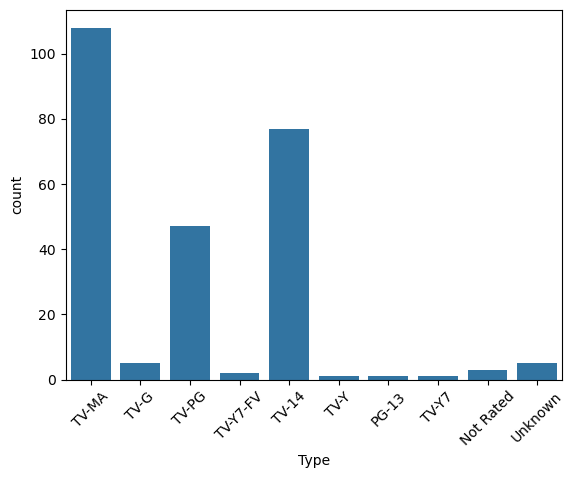

In [44]:
#Explore values in Type feature
print(df['Type'].value_counts())
sns.countplot(x='Type', data=df)
plt.xticks(rotation=45)
plt.show()


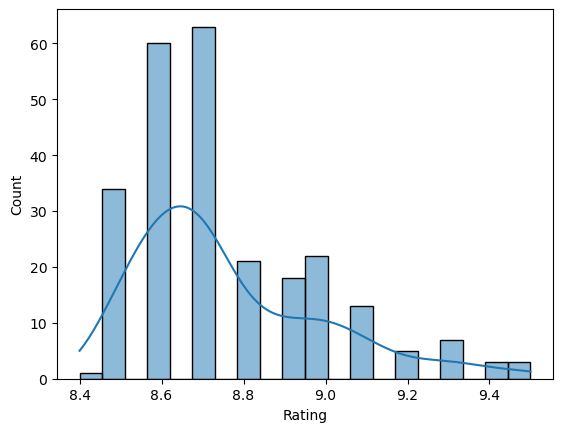

In [46]:
sns.histplot(df['Rating'], bins=20, kde=True)
plt.show()


In [48]:
# Example: Tokenize a sample description
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(word_tokenize(df['Description'].iloc[0]))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deborah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['A', 'chemistry', 'teacher', 'diagnosed', 'with', 'inoperable', 'lung', 'cancer', 'turns', 'to', 'manufacturing', 'and', 'selling', 'methamphetamine', 'with', 'a', 'former', 'student', 'in', 'order', 'to', 'secure', 'his', 'family', "'s", 'future', '.']


In [50]:
df['Episodes'] = df['Episodes'].str.replace(' eps', '').astype(int)

In [54]:
df.head()


,Name,Year,Episodes,Type,Rating,Image-src,Description,Name-href
0,1. Breaking Bad,2008–2013,62,TV-MA,9.5,https://m.media-amazon.com/images/M/MV5BYmQ4YW...,A chemistry teacher diagnosed with inoperable ...,https://www.imdb.com/title/tt0903747/?ref_=cht...
1,2. Planet Earth II,2016,6,TV-G,9.5,https://m.media-amazon.com/images/M/MV5BMGZmYm...,David Attenborough returns with a new wildlife...,https://www.imdb.com/title/tt5491994/?ref_=cht...
2,3. Planet Earth,2006,11,TV-PG,9.4,https://m.media-amazon.com/images/M/MV5BMzMyYj...,A documentary series on the wildlife found on ...,https://www.imdb.com/title/tt0795176/?ref_=cht...
3,4. Band of Brothers,2001,10,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BMTI3OD...,The story of Easy Company of the U.S. Army 101...,https://www.imdb.com/title/tt0185906/?ref_=cht...
4,5. Chernobyl,2019,5,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BNTdkN2...,"In April 1986, an explosion at the Chernobyl n...",https://www.imdb.com/title/tt7366338/?ref_=cht...


In [58]:
#Counting how many ranges there are in [Year]
import re

# Define a regex pattern that matches a hyphen, en dash, or em dash
dash_pattern = r'[-\u2013\u2014]'

# Count entries that contain any type of dash (indicating a range)
ranges_count = df['Year'].str.contains(dash_pattern).sum()

# Count entries that do NOT contain any of these dashes (single year)
single_count = (~df['Year'].str.contains(dash_pattern)).sum()

print("Number of ranges:", ranges_count)
print("Number of single values:", single_count)



Number of ranges: 207
Number of single values: 43


In [62]:
import re

# Define a function to extract the first year from the 'Year' entry
def extract_first_year(year_entry):
    # Split the string using a regex pattern that matches hyphen, en dash, or em dash
    parts = re.split(r'[-\u2013\u2014]', year_entry)
    # Return the first part (stripped of whitespace) as an integer
    return int(parts[0].strip())

# Apply the function to the 'Year' column and create a new column with the numeric year
df['Year'] = df['Year'].apply(extract_first_year)

# Create a new dataframe df2 as a copy of df
df2 = df.copy()

# Drop the 'Image-src' and 'Name-href' columns from df2
df2.drop(['Image-src', 'Name-href'], axis=1, inplace=True)

# Optional: display the first few rows to confirm changes
print(df2.head())



                  Name  Year  Episodes   Type  Rating  \
0      1. Breaking Bad  2008        62  TV-MA     9.5   
1   2. Planet Earth II  2016         6   TV-G     9.5   
2      3. Planet Earth  2006        11  TV-PG     9.4   
3  4. Band of Brothers  2001        10  TV-MA     9.4   
4         5. Chernobyl  2019         5  TV-MA     9.4   

                                         Description  
0  A chemistry teacher diagnosed with inoperable ...  
1  David Attenborough returns with a new wildlife...  
2  A documentary series on the wildlife found on ...  
3  The story of Easy Company of the U.S. Army 101...  
4  In April 1986, an explosion at the Chernobyl n...  


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         250 non-null    object 
 1   Year         250 non-null    int64  
 2   Episodes     250 non-null    int32  
 3   Type         250 non-null    object 
 4   Rating       250 non-null    float64
 5   Description  250 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 10.9+ KB


Working with the description text

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assume 'Description' is a text column in your dataframe
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df2['Description'])

# tfidf_matrix is a sparse matrix where rows represent documents and columns represent words,
# with the values being the TF-IDF scores.


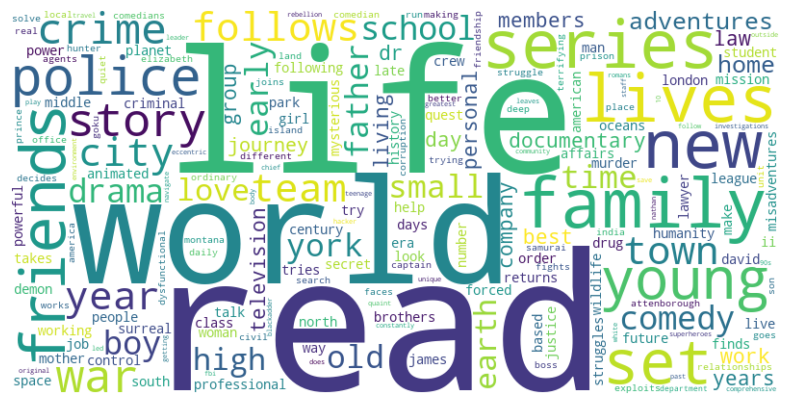

In [77]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Sum the TF-IDF scores for each term across all documents
# tfidf_matrix is a sparse matrix; we convert the sum to a flat array.
tfidf_sum = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Get the feature names (i.e., the words)
terms = vectorizer.get_feature_names_out()

# Create a dictionary mapping each term to its aggregated TF-IDF score
tfidf_dict = dict(zip(terms, tfidf_sum))

# Generate the word cloud using the aggregated scores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.imsave('wordcloud.png', wordcloud.to_array())

plt.show()


In [81]:
# Sort the dictionary items by TF-IDF score in descending order
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the keywords and their frequency values
for word, score in sorted_tfidf:
    print(f"{word}: {score}")


read: 5.7485389389912775
life: 4.633816924695145
world: 4.527685478900692
family: 4.359144487955176
series: 4.086700467764794
new: 4.040358542132442
lives: 3.912187112627054
friends: 3.5118091253531483
set: 3.2847040012596445
young: 2.8796551401192945
police: 2.833288471000461
story: 2.828597981205896
war: 2.7422638510566033
crime: 2.3939794573126645
follows: 2.359421791971953
year: 2.3149215185071332
town: 2.3101200926004926
city: 2.2827371798269533
team: 2.240578758208381
comedy: 2.2052190222217685
drama: 2.172506726566112
school: 2.144456401514014
boy: 2.137267532458358
father: 2.040497236846157
old: 2.006695046487678
york: 1.966582573930243
small: 1.9651680238578058
early: 1.9338179471327275
time: 1.9314983775164232
love: 1.870370394193602
earth: 1.849840088513429
high: 1.8462566009137498
adventures: 1.7805626925236102
home: 1.7619146570764521
documentary: 1.6616208489392854
personal: 1.6479369900489802
members: 1.6244763616269893
best: 1.6030373348889584
dr: 1.5776863397958523
tel

In [83]:
#Create df with keywords and IDF value

df_keywords = pd.DataFrame(sorted_tfidf, columns=['Word', 'TF-IDF'])
print(df_keywords)


          Word    TF-IDF
0         read  5.748539
1         life  4.633817
2        world  4.527685
3       family  4.359144
4       series  4.086700
...        ...       ...
2071      shri  0.187065
2072  shrimati  0.187065
2073        sl  0.187065
2074       tvf  0.187065
2075     verma  0.187065

[2076 rows x 2 columns]


Correlation between rating and 'life' TF-IDF score: 0.049


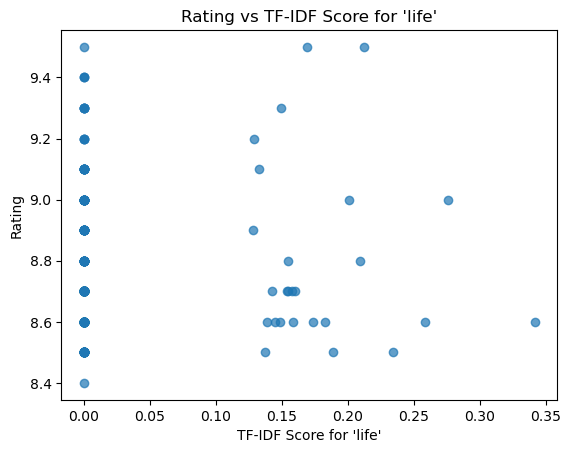

In [87]:
import numpy as np

# Choose a keyword of interest
keyword = 'life'

# Get the vocabulary from the vectorizer
vocab = vectorizer.get_feature_names_out()

if keyword in vocab:
    # Get the index of the keyword
    idx = list(vocab).index(keyword)
    # Extract the TF-IDF scores for the keyword across all documents (series)
    keyword_scores = tfidf_matrix[:, idx].toarray().flatten()
    
    # Add the keyword scores as a new column in df2
    df2['keyword_score'] = keyword_scores

    # Compute the Pearson correlation between the keyword's TF-IDF score and the Rating
    correlation = np.corrcoef(df2['Rating'], df2['keyword_score'])[0,1]
    print(f"Correlation between rating and '{keyword}' TF-IDF score: {correlation:.3f}")
    
    # Optionally, visualize the relationship
    import matplotlib.pyplot as plt
    plt.scatter(df2['keyword_score'], df2['Rating'], alpha=0.7)
    plt.xlabel(f"TF-IDF Score for '{keyword}'")
    plt.ylabel("Rating")
    plt.title(f"Rating vs TF-IDF Score for '{keyword}'")
    plt.show()
else:
    print(f"The keyword '{keyword}' is not present in the vocabulary.")


In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Sum the TF-IDF scores for each term across all documents
tfidf_sum = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Get the feature names (terms) from the vectorizer
terms = vectorizer.get_feature_names_out()

# Create a dictionary mapping each term to its aggregated TF-IDF score
tfidf_dict = dict(zip(terms, tfidf_sum))

# Sort the dictionary items by TF-IDF score in descending order and select the top 25 keywords
sorted_tfidf = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)
top25 = sorted_tfidf[:25]

# Get a list of the vocabulary for easy index lookup
vocab = list(terms)

print("Keyword".ljust(15), "Agg_TFIDF".ljust(12), "Correlation")
for keyword, agg_score in top25:
    # Get the index of the keyword in the vocabulary
    idx = vocab.index(keyword)
    # Extract the TF-IDF scores for the keyword across all documents (series)
    keyword_scores = tfidf_matrix[:, idx].toarray().flatten()
    # Calculate the Pearson correlation between the keyword's TF-IDF score and the Rating
    correlation = np.corrcoef(df2['Rating'], keyword_scores)[0, 1]
    # Print the results in a formatted manner
    print(f"{keyword.ljust(15)} {str(round(agg_score,2)).ljust(12)} {correlation:.3f}")


Keyword         Agg_TFIDF    Correlation
read            5.75         -0.045
life            4.63         0.049
world           4.53         0.160
family          4.36         0.033
series          4.09         0.038
new             4.04         -0.032
lives           3.91         -0.084
friends         3.51         -0.004
set             3.28         0.073
young           2.88         -0.009
police          2.83         -0.045
story           2.83         0.128
war             2.74         0.180
crime           2.39         -0.075
follows         2.36         0.074
year            2.31         -0.045
town            2.31         -0.115
city            2.28         -0.029
team            2.24         -0.081
comedy          2.21         0.019
drama           2.17         -0.015
school          2.14         -0.086
boy             2.14         -0.087
father          2.04         -0.030
old             2.01         -0.033


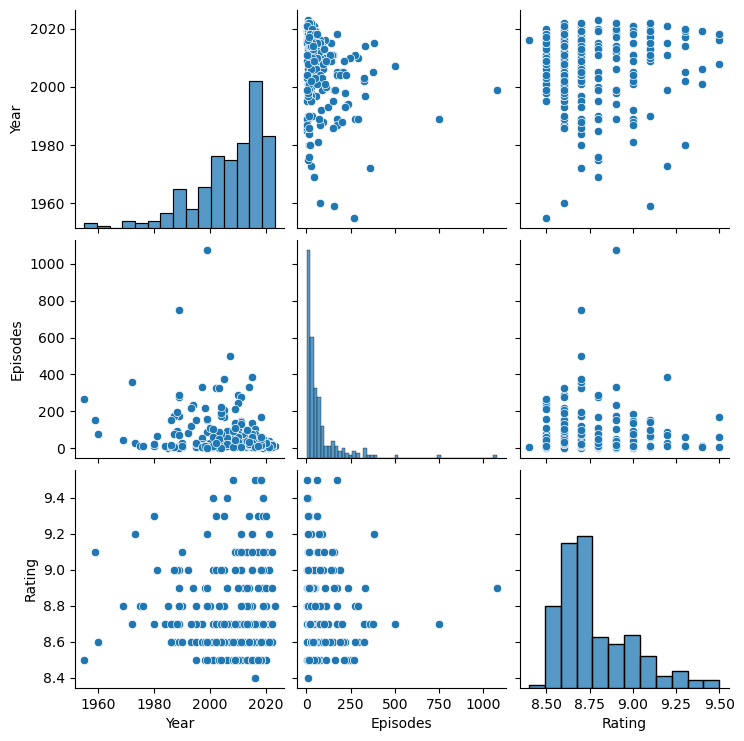

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical columns to include in the pair plot
numerical_cols = ['Year', 'Episodes', 'Rating']

# Create a pair plot of the numerical columns in df2
sns.pairplot(df2[numerical_cols])
plt.show()


In [93]:
#Combined similar 'Type' categories to focus analysis
# Create a mapping dictionary for the Type categories
mapping_dict = {
    'TV-MA': 'MA',
    'TV-14': 'PG14',
    'TV-PG': 'PG',
    'TV-G': 'G',
    'Unknown': 'Other',
    'Not Rated': 'Other',
    'TV-Y7-FV': 'G',
    'TV-Y': 'PG',
    'PG-13': 'PG14',
    'TV-Y7': 'G'
}

# Replace the values in the 'Type' column according to the mapping
df2['Type'] = df2['Type'].replace(mapping_dict)

# Optionally, check the unique values to verify the change
print(df2['Type'].unique())


['MA' 'G' 'PG' 'PG14' 'Other']


In [95]:
# One-hot encode the 'Type' column in df2
df2 = pd.get_dummies(df2, columns=['Type'], drop_first=True)

# Display the first few rows to confirm the encoding
print(df2.head())


                  Name  Year  Episodes  Rating  \
0      1. Breaking Bad  2008        62     9.5   
1   2. Planet Earth II  2016         6     9.5   
2      3. Planet Earth  2006        11     9.4   
3  4. Band of Brothers  2001        10     9.4   
4         5. Chernobyl  2019         5     9.4   

                                         Description  keyword_score  Type_MA  \
0  A chemistry teacher diagnosed with inoperable ...       0.000000     True   
1  David Attenborough returns with a new wildlife...       0.212259    False   
2  A documentary series on the wildlife found on ...       0.000000    False   
3  The story of Easy Company of the U.S. Army 101...       0.000000     True   
4  In April 1986, an explosion at the Chernobyl n...       0.000000     True   

   Type_Other  Type_PG  Type_PG14  
0       False    False      False  
1       False    False      False  
2       False     True      False  
3       False    False      False  
4       False    False      False  


In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           250 non-null    object 
 1   Year           250 non-null    int64  
 2   Episodes       250 non-null    int32  
 3   Rating         250 non-null    float64
 4   Description    250 non-null    object 
 5   keyword_score  250 non-null    float64
 6   Type_MA        250 non-null    bool   
 7   Type_Other     250 non-null    bool   
 8   Type_PG        250 non-null    bool   
 9   Type_PG14      250 non-null    bool   
dtypes: bool(4), float64(2), int32(1), int64(1), object(2)
memory usage: 11.8+ KB


In [227]:
df2['Rating'].describe

<bound method NDFrame.describe of 0      9.5
1      9.5
2      9.4
3      9.4
4      9.4
      ... 
245    8.5
246    8.6
247    8.5
248    8.6
249    8.5
Name: Rating, Length: 250, dtype: float64>

In [99]:
# Compute the cumulative TF-IDF score for each document
cumulative_scores = np.array(tfidf_matrix.sum(axis=1)).flatten()

# Add these cumulative scores as a new column in your DataFrame
df2['cumulative_tfidf'] = cumulative_scores

print(df2[['Rating', 'cumulative_tfidf']].head())


   Rating  cumulative_tfidf
0     9.5          3.840007
1     9.5          3.114806
2     9.4          4.624553
3     9.4          3.823160
4     9.4          3.841928


In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              250 non-null    object 
 1   Year              250 non-null    int64  
 2   Episodes          250 non-null    int32  
 3   Rating            250 non-null    float64
 4   Description       250 non-null    object 
 5   keyword_score     250 non-null    float64
 6   Type_MA           250 non-null    bool   
 7   Type_Other        250 non-null    bool   
 8   Type_PG           250 non-null    bool   
 9   Type_PG14         250 non-null    bool   
 10  cumulative_tfidf  250 non-null    float64
dtypes: bool(4), float64(3), int32(1), int64(1), object(2)
memory usage: 13.8+ KB


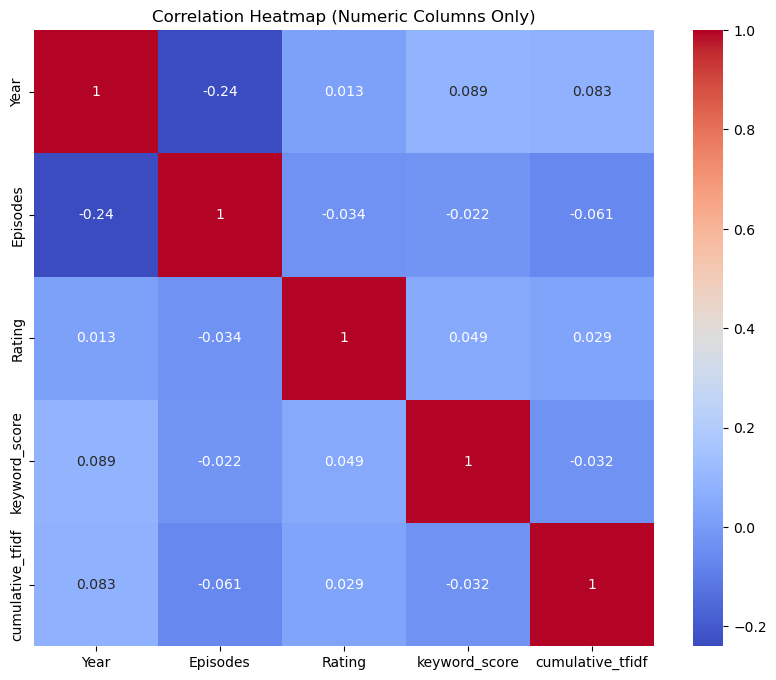

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df2_numeric = df2.select_dtypes(include=['int64', 'int32', 'float64'])

# Create a correlation matrix
corr_matrix = df2_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()



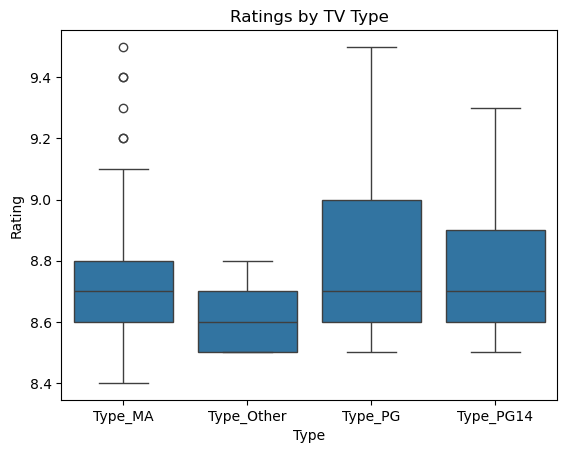

In [127]:
# If you prefer to work with the original 'Type' before one-hot encoding,
# you could use the df2 copy prior to encoding or map the encoded columns back.
# Assuming 'Type_MA', 'Type_Other', etc. are available:
import pandas as pd

# Melt the one-hot encoded columns to long format for easy plotting
type_cols = ['Type_MA', 'Type_Other', 'Type_PG', 'Type_PG14']
df_melted = df2.melt(id_vars=['Rating'], value_vars=type_cols, var_name='Type', value_name='Value')
# Filter for rows where the type is True
df_melted = df_melted[df_melted['Value']]

sns.boxplot(x='Type', y='Rating', data=df_melted)
plt.title("Ratings by TV Type")

plt.savefig('Ratings_Type.png')
plt.show()


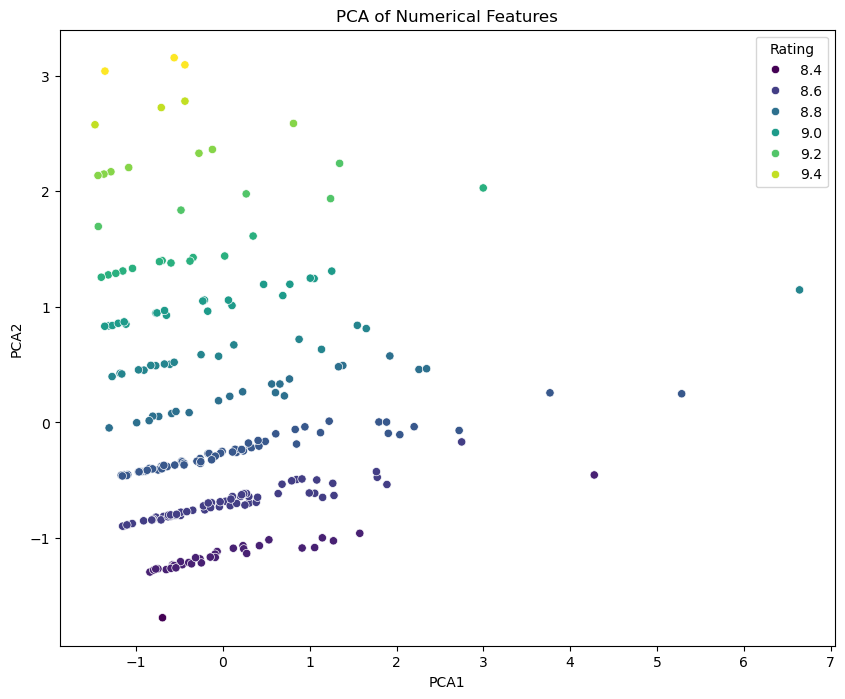

In [229]:
#Dimensionality reduction so can get it down to just 2 dimensions for viz
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Use the numerical features for PCA
X = df2[numerical_cols]

# Suppose X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add the PCA results to your dataframe
df2['PCA1'] = pca_components[:, 0]
df2['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=df2, hue='Rating', palette='viridis')
plt.title("PCA of Numerical Features")
plt.show()


In [231]:
print(pca.explained_variance_ratio_)

[0.41486617 0.33210985]


In [233]:
print(pca.components_)

[[-0.69758106  0.70348632 -0.13596933]
 [-0.1401684   0.05211412  0.98875525]]


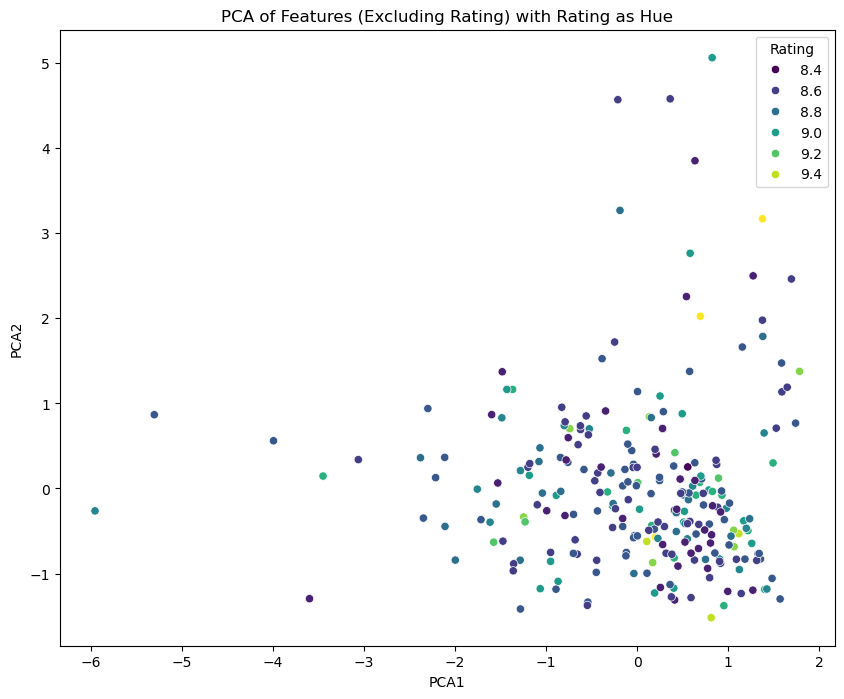

In [129]:
#Excluding Rating from PCA as it seems to be skewing the results

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for PCA, excluding Rating
features_for_pca = ['Year', 'Episodes', 'keyword_score', 'cumulative_tfidf']
X = df2[features_for_pca]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df2['PCA1'] = pca_components[:, 0]
df2['PCA2'] = pca_components[:, 1]

# Plot the PCA results, using Rating as the hue for color-coding
plt.figure(figsize=(10,8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Rating', data=df2, palette='viridis')
plt.title("PCA of Features (Excluding Rating) with Rating as Hue")

plt.savefig('PCA.png')
plt.show()


In [115]:
print(pca.explained_variance_ratio_)


[0.32292534 0.25839348]


In [117]:
print(pca.components_)


[[ 0.67571275 -0.63563413  0.22164872  0.300422  ]
 [ 0.08014396  0.05572626  0.77004011 -0.63048375]]


End PCA
From ChatGPT:
These PCA components tell you how each original feature contributes to the principal components. Let’s break down what you have:

PC1:
Year: 0.676
Episodes: -0.636
keyword_score: 0.222
cumulative_tfidf: 0.300
Interpretation:
PC1 is largely driven by the "Year" and "Episodes" features, but in opposite directions. A positive loading on Year means that shows produced in later years push PC1 higher, while a negative loading on Episodes suggests that having more episodes pulls PC1 lower. The contributions from keyword_score and cumulative_tfidf are smaller but still positive, meaning they add a modest influence.

PC2:
Year: 0.080
Episodes: 0.056
keyword_score: 0.770
cumulative_tfidf: -0.630
Interpretation:
PC2 is dominated by the text-derived features. A strong positive loading on keyword_score combined with a strong negative loading on cumulative_tfidf indicates that PC2 primarily distinguishes series based on the relative emphasis on particular keywords versus the overall textual content. The nearly negligible contributions from Year and Episodes here suggest that PC2 is almost entirely about the text characteristics.

Overall Takeaway:
PC1 seems to capture a contrast between production year and episode count, with a minor influence from text features.
PC2 primarily reflects differences in the textual content of the descriptions.

In [ ]:
#Clustering Analysis

C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

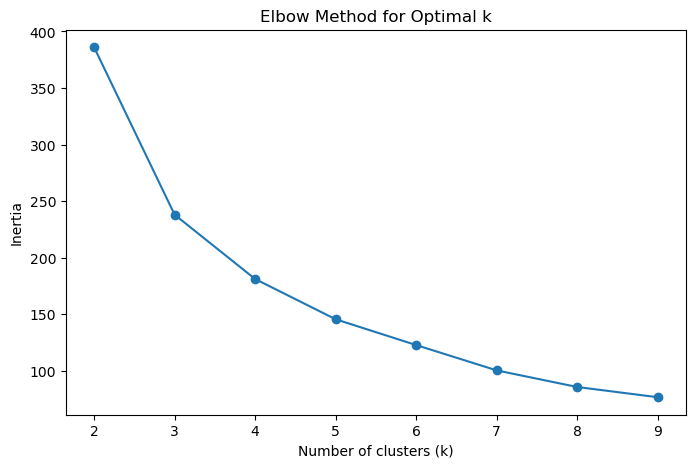

C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

k=2, silhouette score=0.408
k=3, silhouette score=0.456
k=4, silhouette score=0.410
k=5, silhouette score=0.410
k=6, silhouette score=0.344
k=7, silhouette score=0.345
k=8, silhouette score=0.349
k=9, silhouette score=0.352


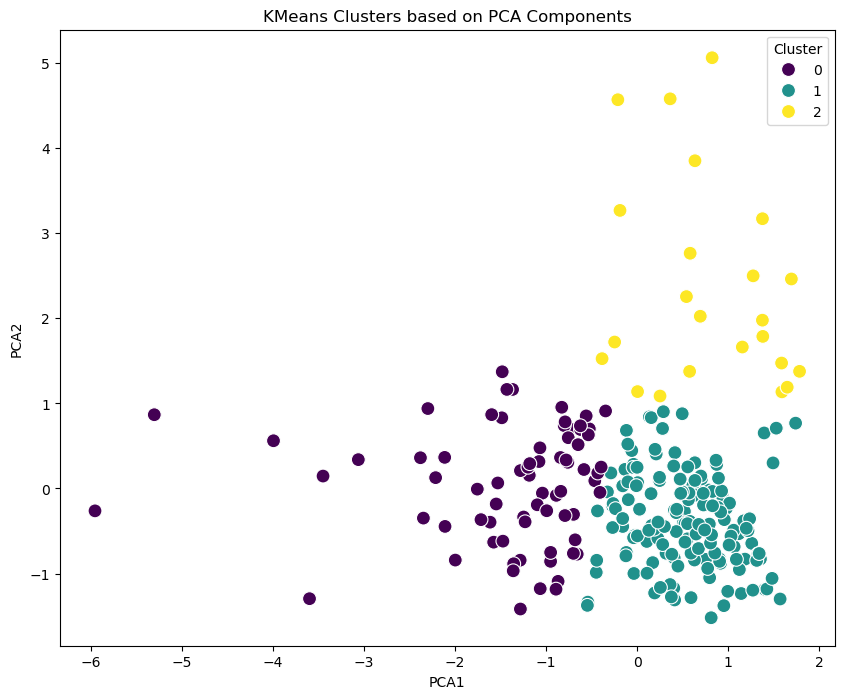

In [131]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assume PCA components have been added to df2 as 'PCA1' and 'PCA2'
X_pca = df2[['PCA1', 'PCA2']]

# Determine an optimal number of clusters using the elbow method
inertia = []
cluster_range = range(2, 10)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# You could also check silhouette scores:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}, silhouette score={score:.3f}")

# After choosing an optimal k (say k=3), fit KMeans:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_pca)

# Visualize clusters:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df2, palette='viridis', s=100)
plt.title("KMeans Clusters based on PCA Components")

plt.savefig('Cluster1.png')
plt.show()


In [133]:
# Group the data by cluster and compute average values for the original features
cluster_summary = df2.groupby('Cluster')[['Year', 'Episodes', 'keyword_score', 'cumulative_tfidf']].mean()
print(cluster_summary)


                Year    Episodes  keyword_score  cumulative_tfidf
Cluster                                                          
0        1993.833333  151.555556       0.000000          3.274319
1        2012.425806   38.522581       0.004326          3.727350
2        2011.608696   63.000000       0.172317          3.358926


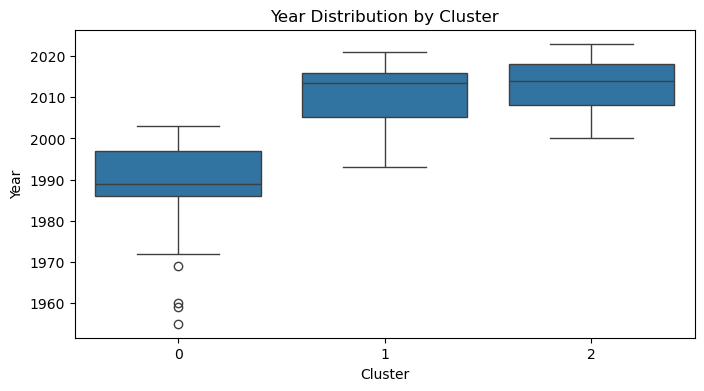

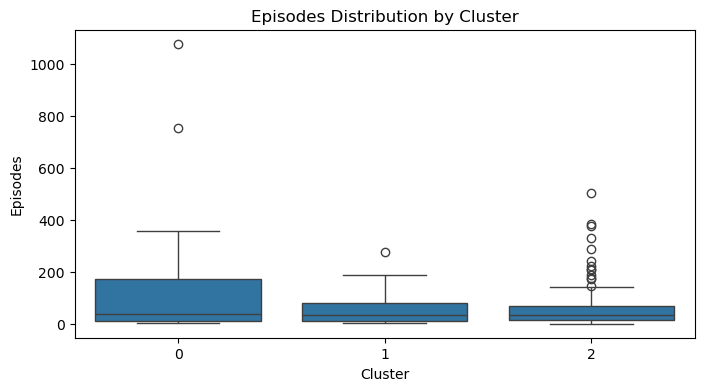

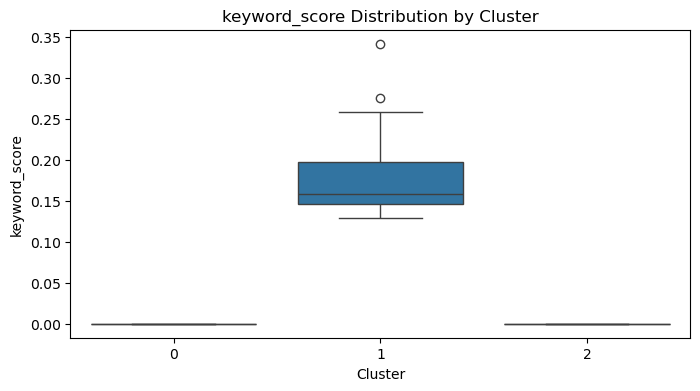

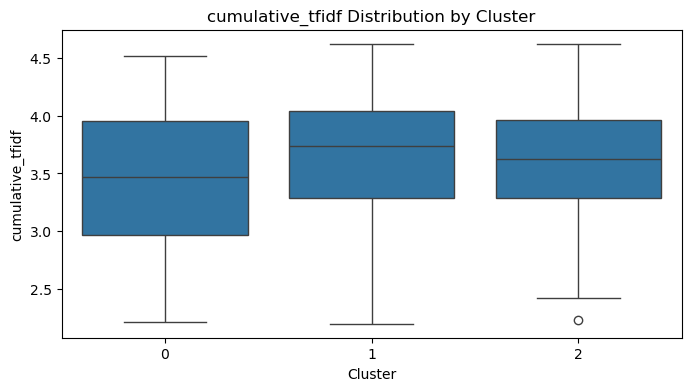

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Year', 'Episodes', 'keyword_score', 'cumulative_tfidf']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=col, data=df2)
    plt.title(f'{col} Distribution by Cluster')
    plt.savefig('boxPCA.png')
    plt.show()


In [137]:
from sklearn.tree import DecisionTreeClassifier

# Use the original features for interpretability
X_features = df2[['Year', 'Episodes', 'keyword_score', 'cumulative_tfidf']]
y_clusters = df2['Cluster']

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_features, y_clusters)

# Print feature importances
importances = dt.feature_importances_
for feat, imp in zip(X_features.columns, importances):
    print(f'{feat}: {imp:.3f}')


Year: 0.393
Episodes: 0.188
keyword_score: 0.252
cumulative_tfidf: 0.166


In [145]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df2[['Year', 'keyword_score', 'Episodes']])


C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


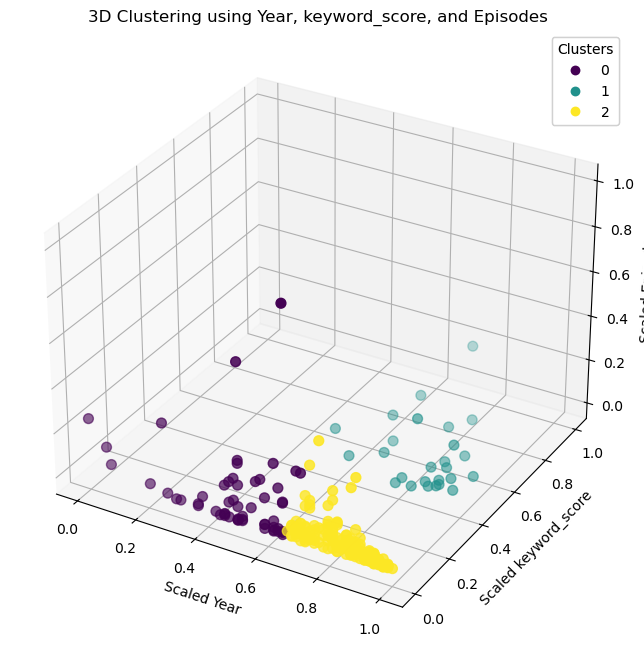

In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
                     c=df2['Cluster'], cmap='viridis', s=50)

# Label the axes
ax.set_xlabel('Scaled Year')
ax.set_ylabel('Scaled keyword_score')
ax.set_zlabel('Scaled Episodes')
plt.title('3D Clustering using Year, keyword_score, and Episodes')

# Optionally, add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


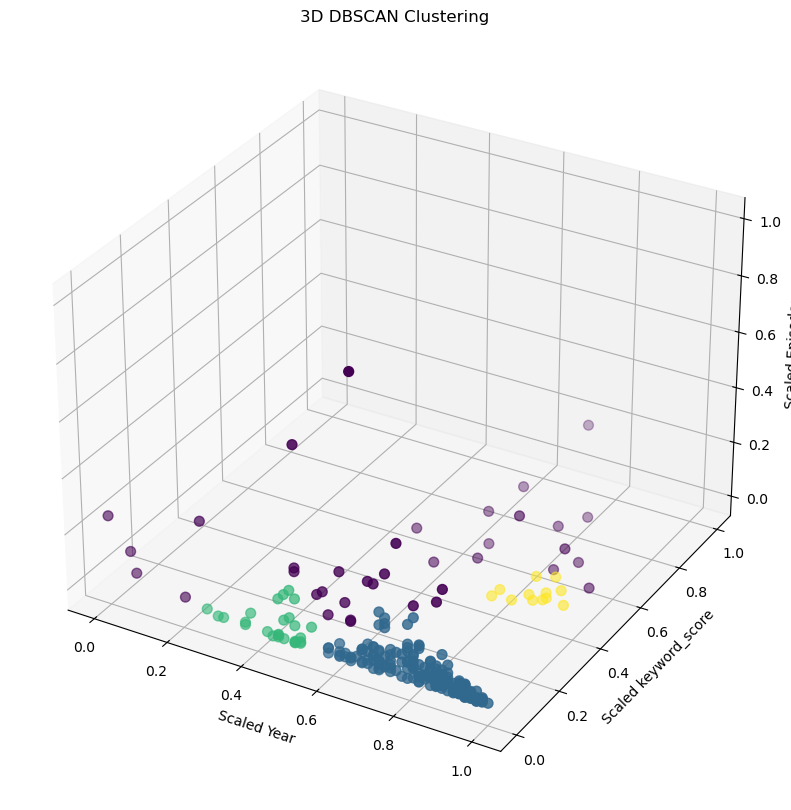

In [161]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you've already scaled your features, e.g., with MinMaxScaler:
# X_scaled = scaler.fit_transform(df2[['Year', 'keyword_score', 'Episodes']])

# Run DBSCAN
dbscan = DBSCAN(eps=0.07, min_samples=5)  # You might need to tune these parameters
df2['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                     c=df2['Cluster_DBSCAN'], cmap='viridis', s=50)
ax.set_xlabel('Scaled Year')
ax.set_ylabel('Scaled keyword_score')
ax.set_zlabel('Scaled Episodes')
plt.title('3D DBSCAN Clustering')
plt.show()


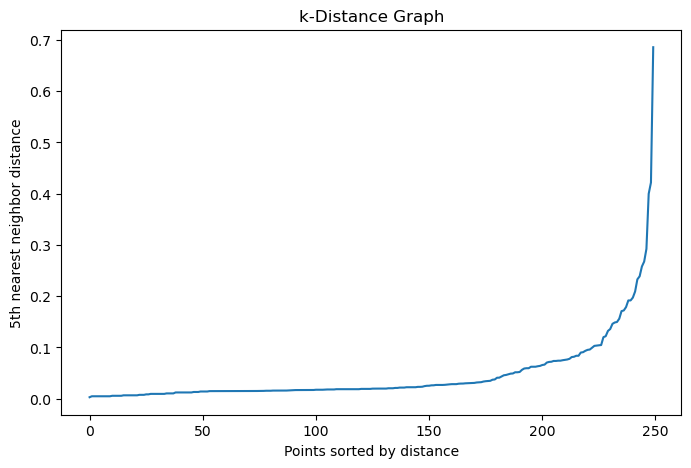

In [151]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# For example, using 5 nearest neighbors (if min_samples=5)
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
# Take the k-th nearest neighbor distance for each point
kth_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 5))
plt.plot(kth_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}th nearest neighbor distance")
plt.title("k-Distance Graph")
plt.show()


eps: 0.010, silhouette score: 0.535
eps: 0.020, silhouette score: 0.494
eps: 0.030, silhouette score: 0.577
eps: 0.040, silhouette score: 0.334
eps: 0.050, silhouette score: 0.360
eps: 0.060, silhouette score: 0.376
eps: 0.070, silhouette score: 0.616
eps: 0.080, silhouette score: 0.608
eps: 0.090, silhouette score: 0.612
eps: 0.100, silhouette score: 0.606


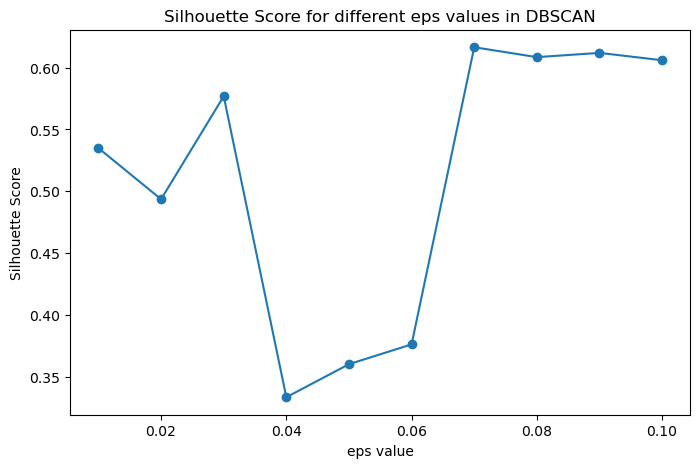

Optimal eps value based on silhouette score: 0.070


In [159]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a range of eps values to test
eps_values = np.linspace(0.01, 0.1, 10)
sil_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    
    # Only calculate the silhouette score if there is more than one cluster
    # and ignore noise points (label == -1)
    if len(set(labels)) > 1 and np.sum(labels != -1) > 1:
        score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    else:
        score = -1  # or np.nan to indicate an invalid clustering result
    sil_scores.append(score)
    print(f"eps: {eps:.3f}, silhouette score: {score:.3f}")

# Plot eps values vs silhouette score
plt.figure(figsize=(8, 5))
plt.plot(eps_values, sil_scores, marker='o')
plt.xlabel("eps value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different eps values in DBSCAN")
plt.show()

# Identify the optimal eps value (one with highest silhouette score)
optimal_eps = eps_values[np.argmax(sil_scores)]
print(f"Optimal eps value based on silhouette score: {optimal_eps:.3f}")


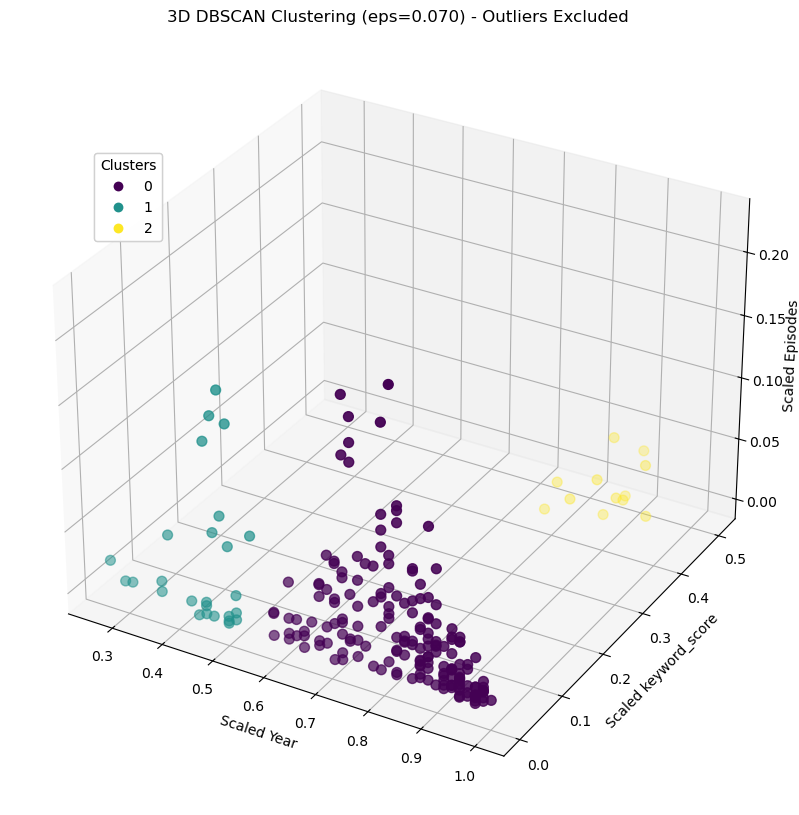

In [185]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Run DBSCAN with eps=0.070 and min_samples=5
dbscan = DBSCAN(eps=0.070, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df2['Cluster_DBSCAN'] = labels

# Exclude outliers (label == -1)
df2_no_outliers = df2[df2['Cluster_DBSCAN'] != -1]
X_scaled_no_outliers = X_scaled[df2['Cluster_DBSCAN'] != -1]

# Visualize the clusters (excluding outliers) in 3D
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled_no_outliers[:, 0], X_scaled_no_outliers[:, 1], X_scaled_no_outliers[:, 2],
                     c=df2_no_outliers['Cluster_DBSCAN'], cmap='viridis', s=50)

legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper left', bbox_to_anchor=(0.1, 0.85))
ax.add_artist(legend)

ax.set_xlabel('Scaled Year')
ax.set_ylabel('Scaled keyword_score')
#ax.set_zlabel('Scaled Episodes')
ax.set_zlabel('Scaled Episodes', labelpad=1)
plt.title('3D DBSCAN Clustering (eps=0.070) - Outliers Excluded')

plt.savefig('DBSCAN.png')
plt.show()


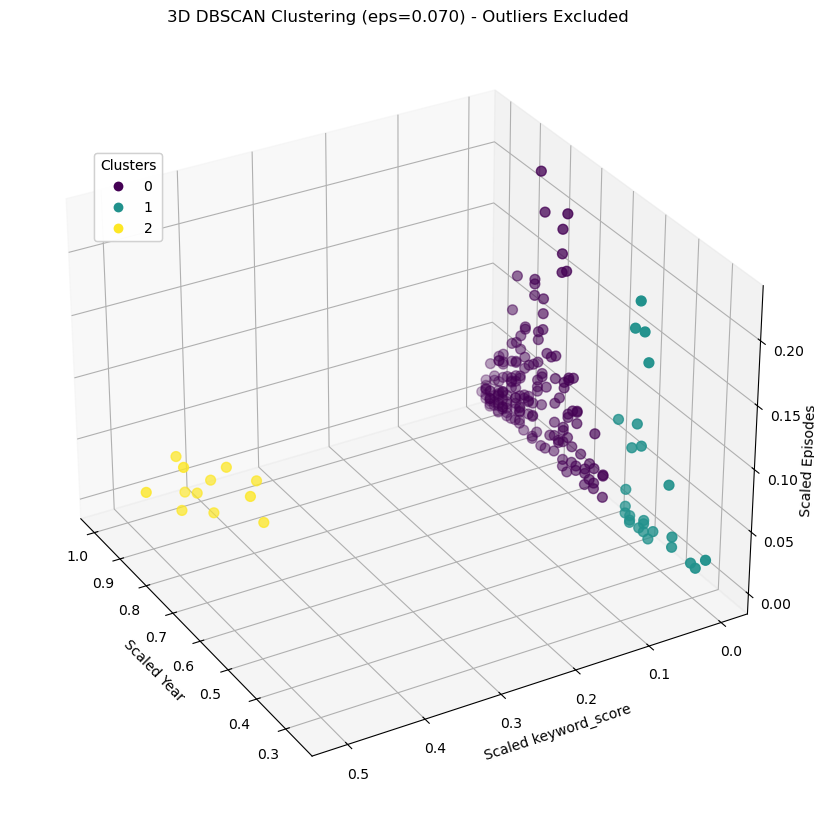

In [191]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Run DBSCAN with eps=0.070 and min_samples=5
dbscan = DBSCAN(eps=0.070, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df2['Cluster_DBSCAN'] = labels

# Exclude outliers (label == -1)
df2_no_outliers = df2[df2['Cluster_DBSCAN'] != -1]
X_scaled_no_outliers = X_scaled[df2['Cluster_DBSCAN'] != -1]

# Visualize the clusters (excluding outliers) in 3D
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')



scatter = ax.scatter(X_scaled_no_outliers[:, 0], X_scaled_no_outliers[:, 1], X_scaled_no_outliers[:, 2],
                     c=df2_no_outliers['Cluster_DBSCAN'], cmap='viridis', s=50)

legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper left', bbox_to_anchor=(0.1, 0.85))
ax.add_artist(legend)

ax.set_xlabel('Scaled Year')
ax.set_ylabel('Scaled keyword_score')
#ax.set_zlabel('Scaled Episodes')
ax.set_zlabel('Scaled Episodes', labelpad=1)
plt.title('3D DBSCAN Clustering (eps=0.070) - Outliers Excluded')

plt.savefig('DBSCAN_view2.png')


# Adjust the view angle (e.g., elev=30 degrees, azim=120 degrees)
ax.view_init(elev=30, azim=150)

plt.show()


                       Year  keyword_score   Episodes    Rating  \
Cluster_DBSCAN                                                    
0               2011.605714       0.000000  46.520000  8.750857   
1               1985.461538       0.000000  50.346154  8.819231   
2               2015.083333       0.147242  28.000000  8.758333   

                cumulative_tfidf  
Cluster_DBSCAN                    
0                       3.560406  
1                       3.618520  
2                       3.994699  


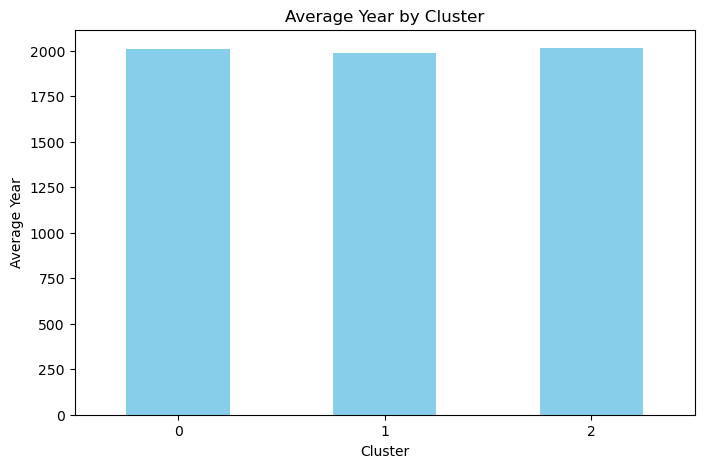

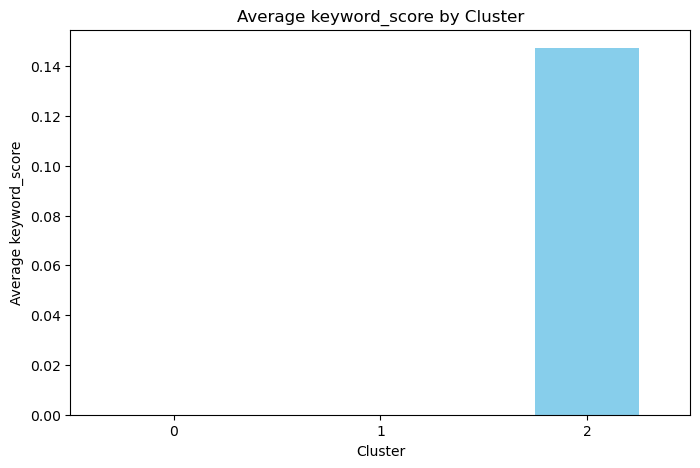

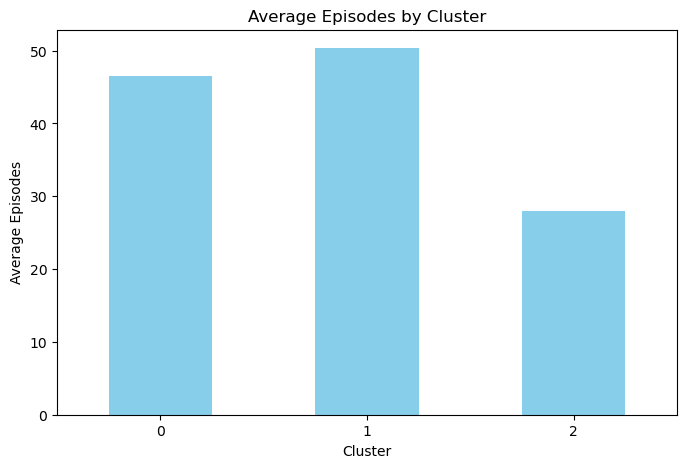

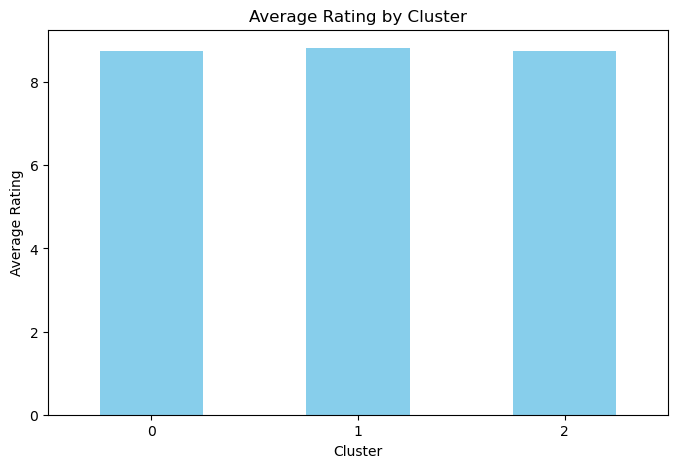

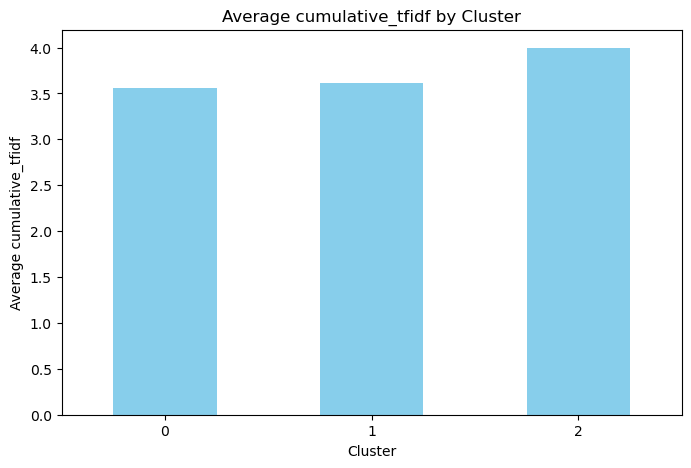

In [167]:
import matplotlib.pyplot as plt

# Assume df2_no_outliers is your DataFrame with outliers (noise points) removed
# Group by the cluster label and calculate the mean for each feature
cluster_summary = df2_no_outliers.groupby('Cluster_DBSCAN')[['Year', 'keyword_score', 'Episodes', 'Rating', 'cumulative_tfidf']].mean()

print(cluster_summary)

# Plot bar charts for each feature
features_to_plot = ['Year', 'keyword_score', 'Episodes', 'Rating', 'cumulative_tfidf']

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    cluster_summary[feature].plot(kind='bar', color='skyblue')
    plt.title(f'Average {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.xticks(rotation=0)
    plt.show()


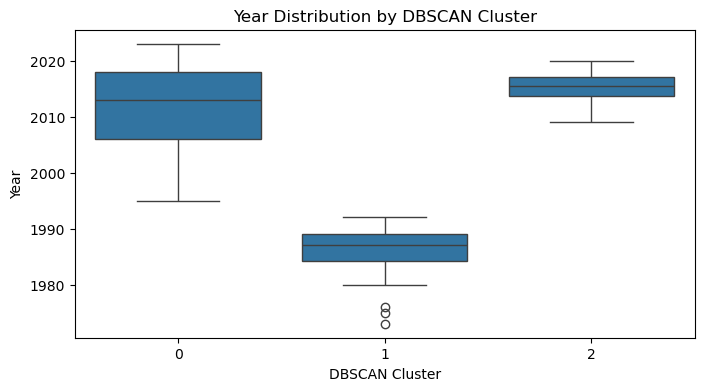

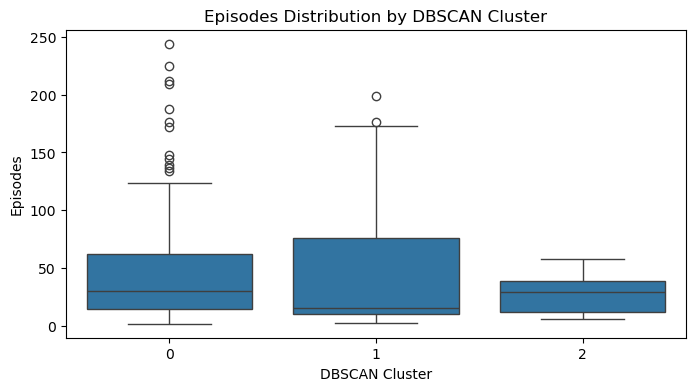

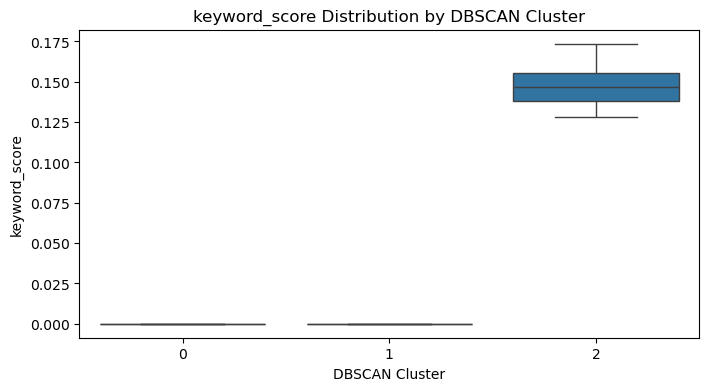

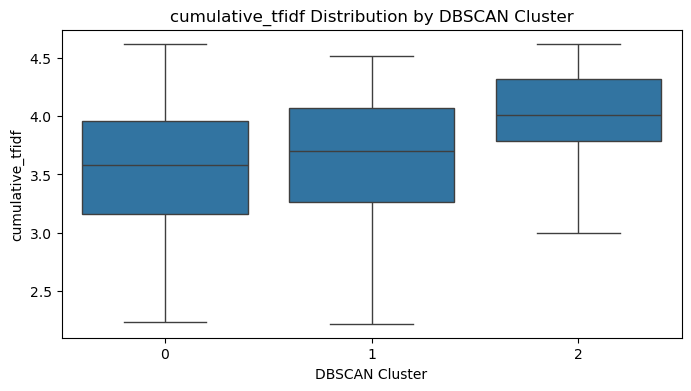

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through the desired columns and display boxplots grouped by the DBSCAN clusters
for col in ['Year', 'Episodes', 'keyword_score', 'cumulative_tfidf']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster_DBSCAN', y=col, data=df2_no_outliers)
    plt.title(f'{col} Distribution by DBSCAN Cluster')
    plt.xlabel('DBSCAN Cluster')
    plt.ylabel(col)

    plt.savefig('DBSCAN_box.png')
    plt.show()


Since keyword_score doesn't impact two of the clusters, substitute with 'Rating instead

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a range of eps values to test
eps_values = np.linspace(0.01, 0.1, 10)
sil_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    
    # Only calculate the silhouette score if there is more than one cluster
    # and ignore noise points (label == -1)
    if len(set(labels)) > 1 and np.sum(labels != -1) > 1:
        score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    else:
        score = -1  # or np.nan to indicate an invalid clustering result
    sil_scores.append(score)
    print(f"eps: {eps:.3f}, silhouette score: {score:.3f}")

# Plot eps values vs silhouette score
plt.figure(figsize=(8, 5))
plt.plot(eps_values, sil_scores, marker='o')
plt.xlabel("eps value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different eps values in DBSCAN")
plt.show()

# Identify the optimal eps value (one with highest silhouette score)
optimal_eps = eps_values[np.argmax(sil_scores)]
print(f"Optimal eps value based on silhouette score: {optimal_eps:.3f}")


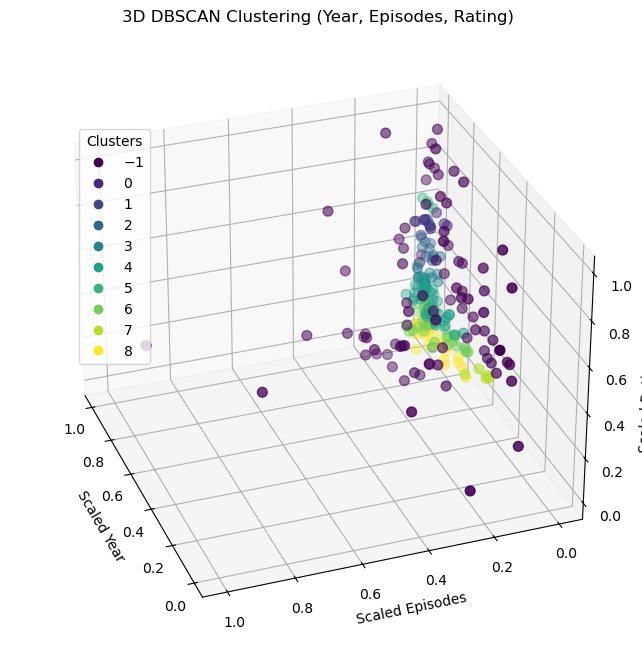

In [221]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the features to use
features = ['Year', 'Episodes', 'Rating']
X = df2[features]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Run DBSCAN with eps=0.07 and min_samples=5
dbscan = DBSCAN(eps=0.07, min_samples=5)


labels = dbscan.fit_predict(X_scaled)
df2['Cluster_DBSCAN_YER_EP_RATING'] = labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                     c=labels, cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper left', bbox_to_anchor=(0.1, 0.85))
                   
# Label the axes
ax.set_xlabel('Scaled Year')
ax.set_ylabel('Scaled Episodes')
ax.set_zlabel('Scaled Rating')
plt.title('3D DBSCAN Clustering (Year, Episodes, Rating)')

# Optionally adjust the view angle
ax.view_init(elev=30, azim=160)
plt.show()


eps: 0.010, silhouette score: -1.000
eps: 0.020, silhouette score: 0.681
eps: 0.030, silhouette score: 0.569
eps: 0.040, silhouette score: 0.467
eps: 0.050, silhouette score: 0.282
eps: 0.060, silhouette score: 0.231
eps: 0.070, silhouette score: 0.222
eps: 0.080, silhouette score: 0.197
eps: 0.090, silhouette score: 0.198
eps: 0.100, silhouette score: 0.372


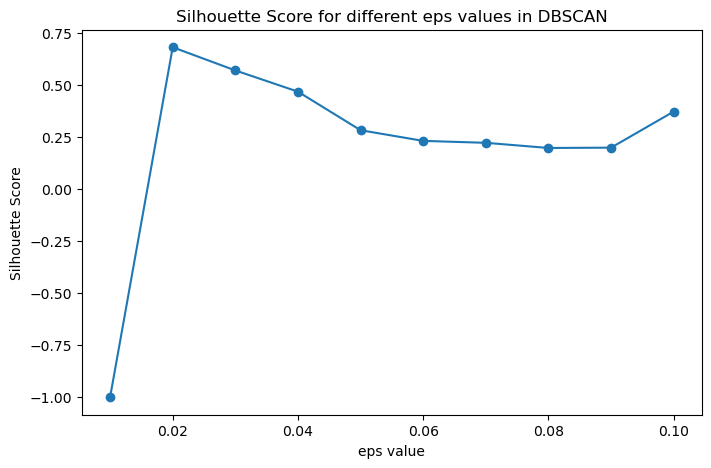

Optimal eps value based on silhouette score: 0.020


In [201]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a range of eps values to test
eps_values = np.linspace(0.01, 0.1, 10)
sil_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    
    # Only calculate the silhouette score if there is more than one cluster
    # and ignore noise points (label == -1)
    if len(np.unique(labels[labels != -1])) > 1 and np.sum(labels != -1) > 1:

    #if len(set(labels)) > 1 and np.sum(labels != -1) > 1:
        score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    else:
        score = -1  # or np.nan to indicate an invalid clustering result
    sil_scores.append(score)
    print(f"eps: {eps:.3f}, silhouette score: {score:.3f}")

# Plot eps values vs silhouette score
plt.figure(figsize=(8, 5))
plt.plot(eps_values, sil_scores, marker='o')
plt.xlabel("eps value")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different eps values in DBSCAN")
plt.show()

# Identify the optimal eps value (one with highest silhouette score)
optimal_eps = eps_values[np.argmax(sil_scores)]
print(f"Optimal eps value based on silhouette score: {optimal_eps:.3f}")


As rating was dominating PC2 (reason for its original omission), decided to try kernal PCA with rating

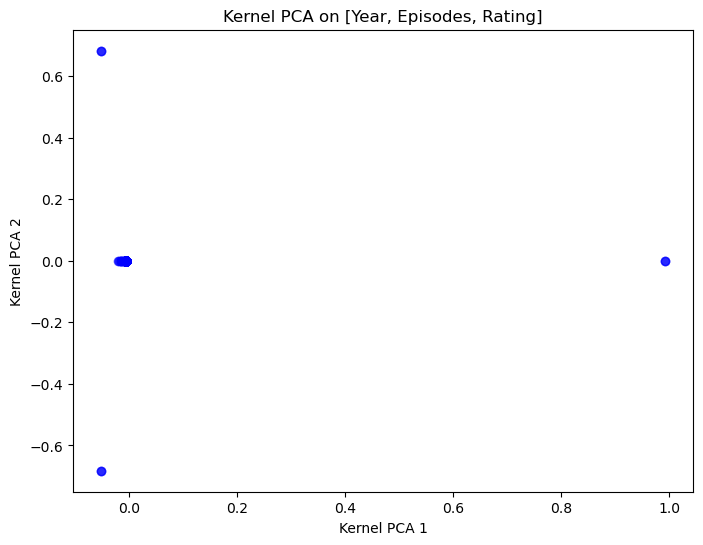

In [235]:
from sklearn.decomposition import KernelPCA

# Assume X is your data with columns [Year, Episodes, Rating]
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

# Then you can visualize the transformed features:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='blue', alpha=0.6)
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.title('Kernel PCA on [Year, Episodes, Rating]')
plt.show()


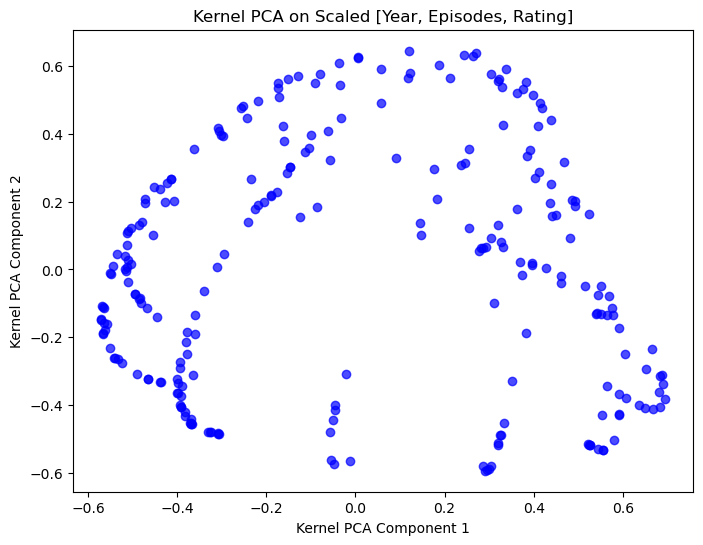

The 'lambdas_' attribute is not available in this version of KernelPCA.
Here are the eigenvectors (alphas_):


AttributeError: 'KernelPCA' object has no attribute 'alphas_'

In [245]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import numpy as np

# Assume X is your data with columns [Year, Episodes, Rating]
features = ['Year', 'Episodes', 'Rating']
X = df2[features].values

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_scaled)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='blue', alpha=0.7)
plt.xlabel('Kernel PCA Component 1')
plt.ylabel('Kernel PCA Component 2')
plt.title('Kernel PCA on Scaled [Year, Episodes, Rating]')
plt.savefig('kPCA.png')
plt.show()
'''
# Display eigenvalues from Kernel PCA as a proxy for "components"
print("Eigenvalues (lambdas_):")
print(kpca.lambdas_)
'''
# Check if lambdas_ is available; if not, print alphas_
if hasattr(kpca, 'lambdas_'):
    print("Eigenvalues (lambdas_):")
    print(kpca.lambdas_)
else:
    print("The 'lambdas_' attribute is not available in this version of KernelPCA.")
    print("Here are the eigenvectors (alphas_):")
    print(kpca.alphas_)



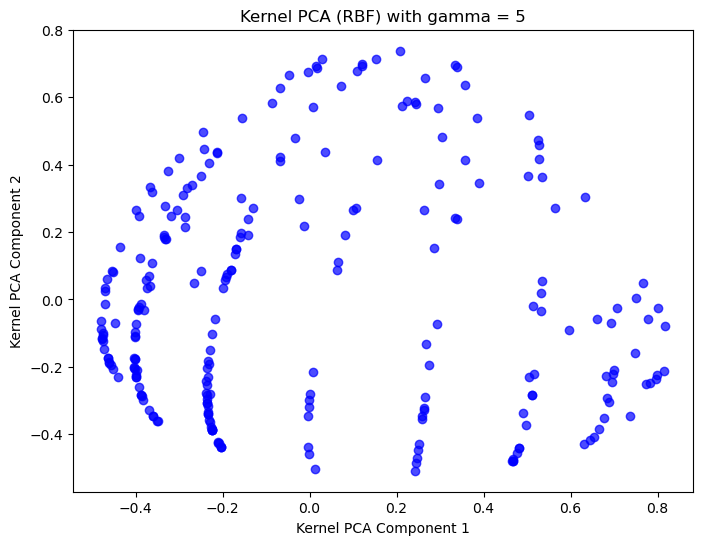

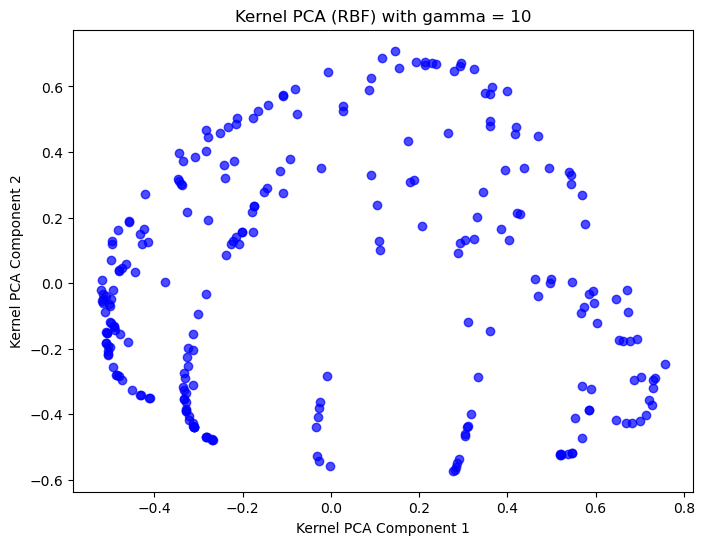

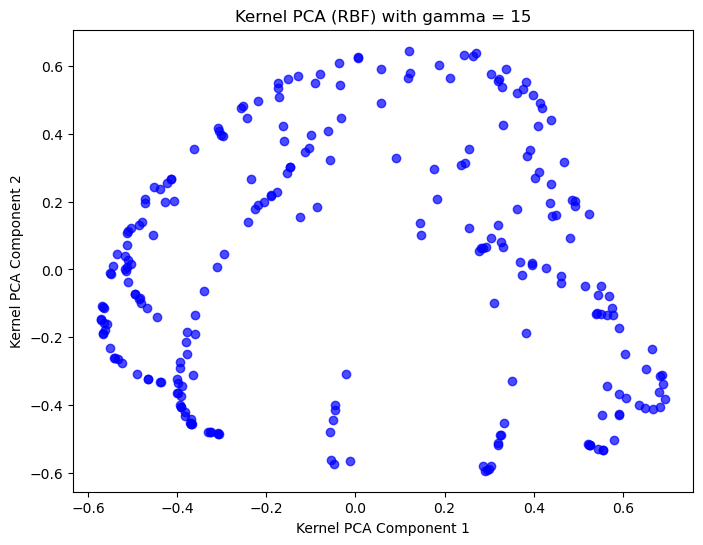

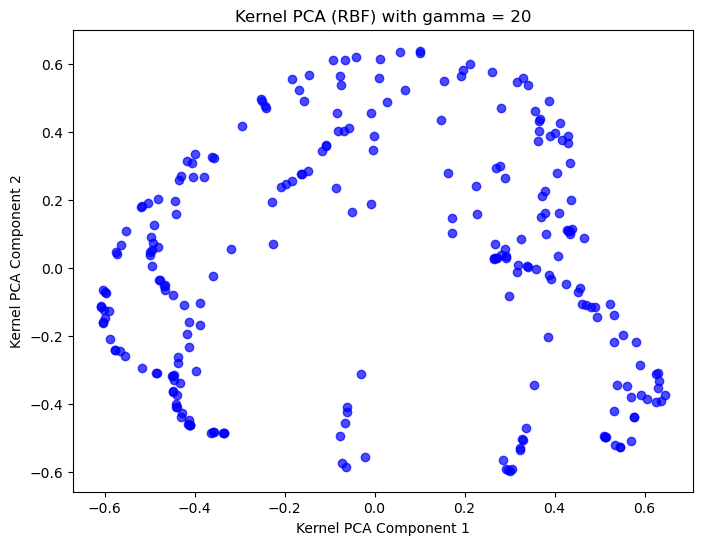

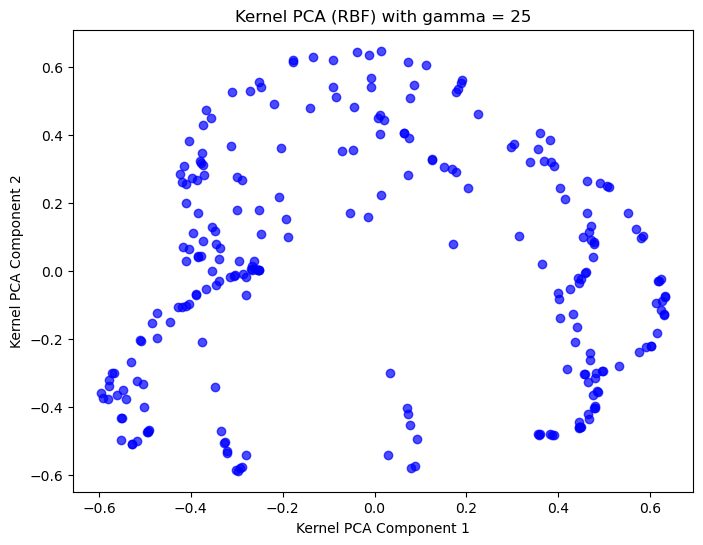

In [261]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Scale the data using MinMaxScaler
features = ['Year', 'Episodes', 'Rating']
X = df2[features].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Try a range of gamma values for the RBF kernel
gamma_values = [5, 10, 15, 20, 25]
for gamma in gamma_values:
    kpca = KernelPCA(n_components=5, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='blue', alpha=0.7)
    plt.xlabel('Kernel PCA Component 1')
    plt.ylabel('Kernel PCA Component 2')
    plt.title(f'Kernel PCA (RBF) with gamma = {gamma}')
    plt.show()


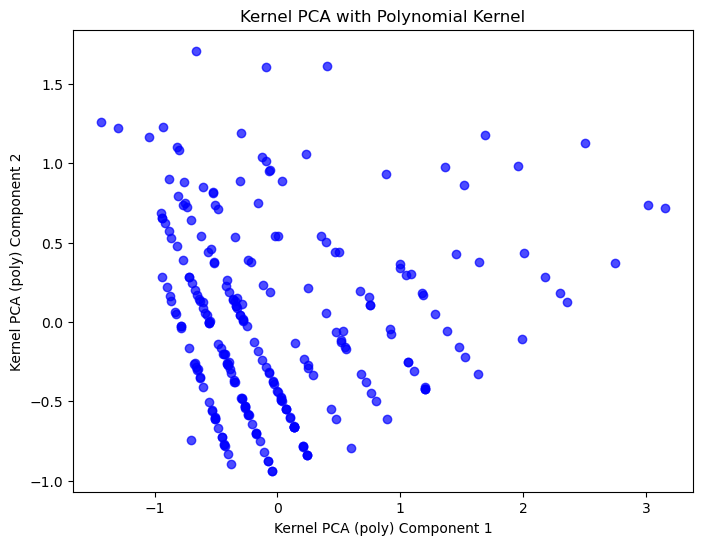

In [259]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import numpy as np

# Assume X is your data with columns [Year, Episodes, Rating]
features = ['Year', 'Episodes', 'Rating']
X = df2[features].values

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply KernelPCA with a polynomial kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3, gamma=1, coef0=1)
X_kpca_poly = kpca_poly.fit_transform(X_scaled)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c='blue', alpha=0.7)
plt.xlabel('Kernel PCA (poly) Component 1')
plt.ylabel('Kernel PCA (poly) Component 2')
plt.title('Kernel PCA with Polynomial Kernel')
plt.show()


C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


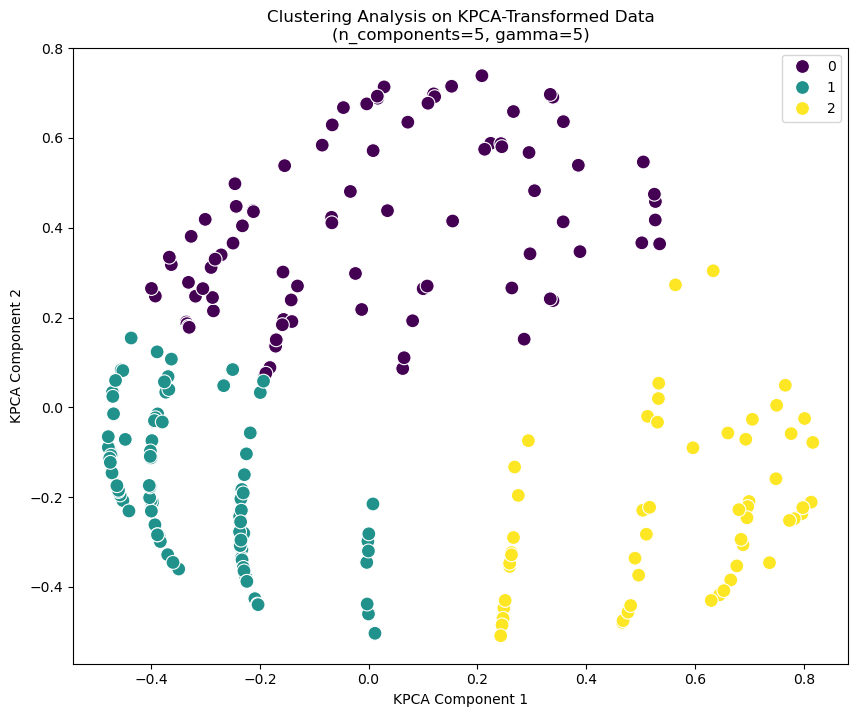

Cluster centroids in KPCA space:
[[ 0.00335085  0.39476094 -0.05149912 -0.00478705  0.00885561]
 [-0.31492899 -0.19278294  0.03826372  0.0375601   0.02393914]
 [ 0.55018798 -0.24228433  0.00849147 -0.05914875 -0.05525608]]


In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

# Assuming df2 contains the features 'Year', 'Episodes', and 'Rating'
features = ['Year', 'Episodes', 'Rating']
X = df2[features].values

# Scale the data with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA with n_components=5 and gamma=5 using an RBF kernel
kpca = KernelPCA(n_components=5, kernel='rbf', gamma=5)
X_kpca = kpca.fit_transform(X_scaled)

# Perform cluster analysis in the KPCA-transformed space using KMeans
# Here we assume 3 clusters, but you can adjust as needed
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_kpca)
df2['Cluster_KPCA'] = clusters

# Visualize the clusters using the first two KPCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Clustering Analysis on KPCA-Transformed Data\n(n_components=5, gamma=5)')
plt.xlabel('KPCA Component 1')
plt.ylabel('KPCA Component 2')
plt.show()

# Optionally, print the cluster centroids in KPCA space
print("Cluster centroids in KPCA space:")
print(kmeans.cluster_centers_)


In [265]:
import pandas as pd
import numpy as np

# Create a DataFrame for KPCA components
kpca_df = pd.DataFrame(X_kpca, columns=[f'KPCA_{i+1}' for i in range(X_kpca.shape[1])])
orig_df = df2[features].reset_index(drop=True)

# Compute correlations
correlations = pd.concat([orig_df, kpca_df], axis=1).corr()
print(correlations.loc[features, kpca_df.columns])


            KPCA_1    KPCA_2    KPCA_3    KPCA_4    KPCA_5
Year     -0.214733 -0.885239 -0.014331 -0.236364 -0.127586
Episodes  0.063259  0.259378  0.155335 -0.416963  0.646121
Rating    0.924494 -0.200186  0.073777 -0.038579 -0.071472


In [267]:
from sklearn.ensemble import RandomForestClassifier

# Use the original features to predict the KPCA cluster labels
X_orig = df2[features]
y = df2['Cluster_KPCA']

clf = RandomForestClassifier(random_state=42)
clf.fit(X_orig, y)

# Get feature importances
importances = clf.feature_importances_
for feat, imp in zip(features, importances):
    print(f"{feat}: {imp:.3f}")


Year: 0.498
Episodes: 0.135
Rating: 0.366


In [271]:
df2.columns


Index(['Name', 'Year', 'Episodes', 'Rating', 'Description', 'keyword_score',
       'Type_MA', 'Type_Other', 'Type_PG', 'Type_PG14', 'cumulative_tfidf',
       'PCA1', 'PCA2', 'Cluster', 'Cluster_DBSCAN',
       'Cluster_DBSCAN_YER_EP_RATING', 'Cluster_KPCA'],
      dtype='object')

C:\Users\Deborah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


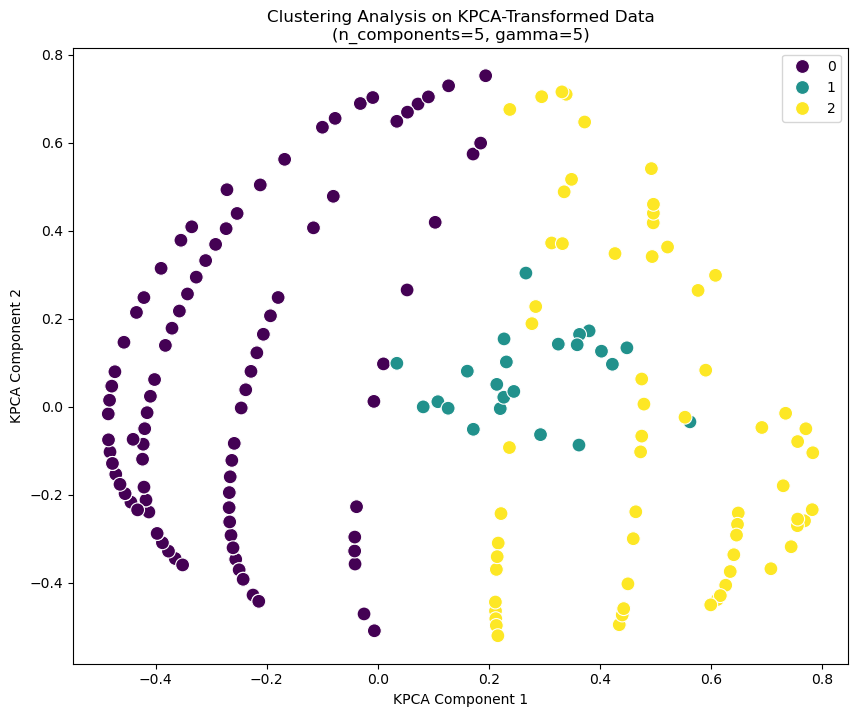

Cluster centroids in KPCA space:
[[-0.2656387   0.02868918 -0.04877155  0.01085453 -0.00325883]
 [ 0.27131545  0.06940153  0.71263323 -0.25501873 -0.06794961]
 [ 0.47490554 -0.08238862 -0.12164035  0.05744976  0.02828358]]


In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans

# Assuming df2 contains the features 'Year', 'Episodes', and 'Rating'
features = ['Year', 'keyword_score', 'Rating']
X = df2[features].values

# Scale the data with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Kernel PCA with n_components=5 and gamma=5 using an RBF kernel
kpca = KernelPCA(n_components=5, kernel='rbf', gamma=5)
X_kpca = kpca.fit_transform(X_scaled)

# Perform cluster analysis in the KPCA-transformed space using KMeans
# Here we assume 3 clusters, but you can adjust as needed
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_kpca)
df2['Cluster_KPCA'] = clusters

# Visualize the clusters using the first two KPCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Clustering Analysis on KPCA-Transformed Data\n(n_components=5, gamma=5)')
plt.xlabel('KPCA Component 1')
plt.ylabel('KPCA Component 2')
plt.savefig('KPCA_YRkey.png')
plt.show()

# Optionally, print the cluster centroids in KPCA space
print("Cluster centroids in KPCA space:")
print(kmeans.cluster_centers_)

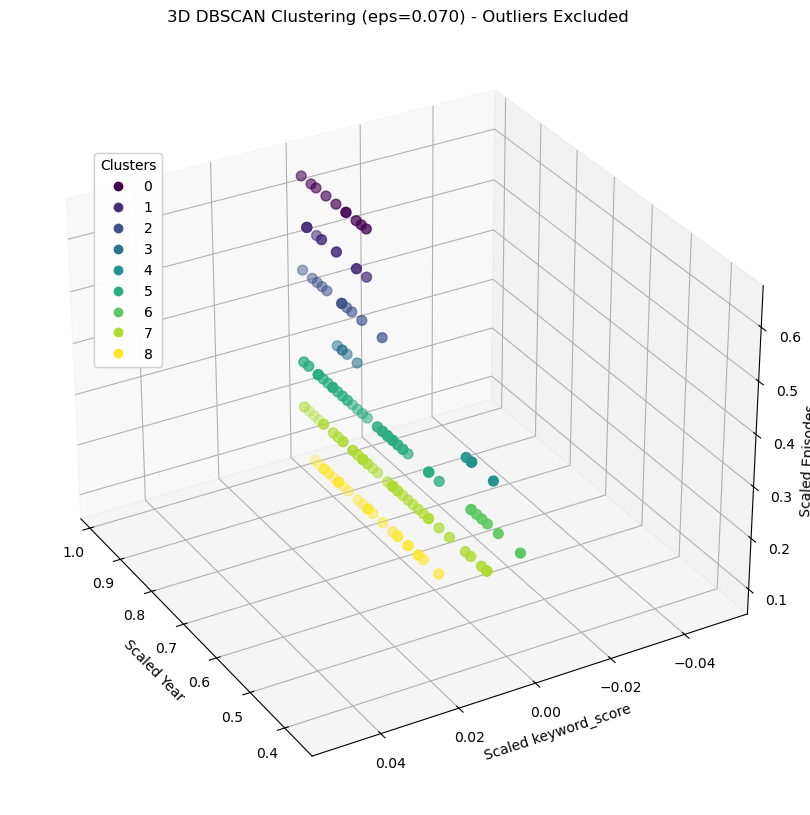

In [275]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Run DBSCAN with eps=0.070 and min_samples=5
dbscan = DBSCAN(eps=0.070, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df2['Cluster_DBSCAN_2'] = labels

# Exclude outliers (label == -1)
df2_no_outliers = df2[df2['Cluster_DBSCAN_2'] != -1]
X_scaled_no_outliers = X_scaled[df2['Cluster_DBSCAN_2'] != -1]

# Visualize the clusters (excluding outliers) in 3D
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')



scatter = ax.scatter(X_scaled_no_outliers[:, 0], X_scaled_no_outliers[:, 1], X_scaled_no_outliers[:, 2],
                     c=df2_no_outliers['Cluster_DBSCAN_2'], cmap='viridis', s=50)

legend = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper left', bbox_to_anchor=(0.1, 0.85))
ax.add_artist(legend)

ax.set_xlabel('Scaled Year')
ax.set_ylabel('Scaled keyword_score')
#ax.set_zlabel('Scaled Episodes')
ax.set_zlabel('Scaled Episodes', labelpad=1)
plt.title('3D DBSCAN Clustering (eps=0.070) - Outliers Excluded')

plt.savefig('DBSCAN_view3.png')


# Adjust the view angle (e.g., elev=30 degrees, azim=120 degrees)
ax.view_init(elev=30, azim=150)

plt.show()


In [285]:
df2.columns

Index(['Name', 'Year', 'Episodes', 'Rating', 'Description', 'keyword_score',
       'Type_MA', 'Type_Other', 'Type_PG', 'Type_PG14', 'cumulative_tfidf',
       'PCA1', 'PCA2', 'Cluster', 'Cluster_DBSCAN',
       'Cluster_DBSCAN_YER_EP_RATING', 'Cluster_KPCA', 'Cluster_DBSCAN_2'],
      dtype='object')

In [287]:
from sklearn.ensemble import RandomForestClassifier

# Use the original features to predict the KPCA cluster labels
X_orig = df2[features]
y = df2['Cluster_KPCA']

clf = RandomForestClassifier(random_state=42)
clf.fit(X_orig, y)

# Get feature importances
importances = clf.feature_importances_
for feat, imp in zip(features, importances):
    print(f"{feat}: {imp:.3f}")

Year: 0.117
keyword_score: 0.253
Rating: 0.630
